# 201726904

## Question 1

In [ ]:
import numpy as np
import scipy.io as sio
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

### a)

In [ ]:
!wget "http://www.ehu.eus/ccwintco/uploads/a/a3/Salinas_corrected.mat"

!wget "http://www.ehu.eus/ccwintco/uploads/f/fa/Salinas_gt.mat"

--2021-11-11 06:19:07--  http://www.ehu.eus/ccwintco/uploads/a/a3/Salinas_corrected.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26552770 (25M)
Saving to: ‘Salinas_corrected.mat’

Salinas_corrected.m 100%[===================>]  25.32M   565KB/s    in 46s     

2021-11-11 06:19:54 (560 KB/s) - ‘Salinas_corrected.mat’ saved [26552770/26552770]

--2021-11-11 06:19:54--  http://www.ehu.eus/ccwintco/uploads/f/fa/Salinas_gt.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4277 (4.2K)
Saving to: ‘Salinas_gt.mat’

Salinas_gt.mat      100%[===================>]   4.18K  --.-KB/s    in 0s      

2021-11-11 06:19:54 (272 MB/s) - ‘Salinas_gt.mat’ saved [4277/4277]



### b)

In [ ]:
!ls

Salinas_corrected.mat  Salinas_gt.mat  sample_data


In [ ]:
#reading the data
salinas_scene = sio.loadmat('Salinas_corrected.mat')
ground_truth = sio.loadmat('Salinas_gt.mat')['salinas_gt']

In [ ]:
salinas_scene.keys()

dict_keys(['__header__', '__version__', '__globals__', 'salinas_corrected'])

In [ ]:
salinas_scene_key=list(salinas_scene.keys())
salinas_scene_IN = (salinas_scene[salinas_scene_key[3]])
print(salinas_scene_IN)

[[[290 381 585 ...  36  11  17]
  [290 381 519 ...  36  11  15]
  [290 381 585 ...  30  11  11]
  ...
  [373 482 594 ...   6   4   0]
  [373 482 659 ...   0   0   5]
  [305 393 655 ...   1   1  -3]]

 [[379 400 600 ...  32  11  15]
  [308 400 535 ...  28  15  13]
  [379 483 535 ...  26   5  15]
  ...
  [376 477 590 ...   3   0  -5]
  [376 477 590 ...   7   0  13]
  [305 393 655 ...   1   1  -3]]

 [[369 495 604 ...  29   9  17]
  [298 411 604 ...  23   5  13]
  [298 411 670 ...  27   7  13]
  ...
  [447 468 664 ...   4   7   0]
  [305 468 664 ...  14   7   2]
  [447 384 664 ...   6   1   4]]

 ...

 [[379 383 540 ...   6   5   9]
  [308 383 540 ...   8   5   5]
  [379 383 540 ...   4  -2   7]
  ...
  [367 387 661 ...  39  17  23]
  [367 470 661 ...  43  15  23]
  [438 470 596 ...  41  13  27]]

 [[314 479 604 ...   8   5   0]
  [314 396 539 ...   4   3   2]
  [385 396 539 ...   2   1   0]
  ...
  [367 387 661 ...  39  17  23]
  [367 470 661 ...  43  15  23]
  [376 489 674 ...  42  15  

In [ ]:

print(salinas_scene_IN.shape)

(512, 217, 204)


The total number of the bands in the salinas scene dataset is 204

### c)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_band(dataset):
    plt.figure(figsize=(8, 6))
    band_no = np.random.randint(dataset.shape[2])
    plt.imshow(dataset[:,:, band_no], cmap='jet')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()

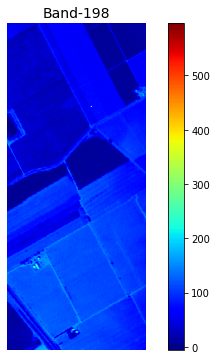

In [ ]:
plot_band(salinas_scene_IN)

#### Visualizing the ground truths


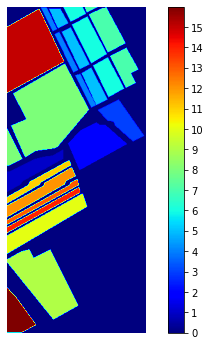

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(ground_truth, cmap='jet')
plt.axis('off')
plt.colorbar(ticks= range(0,16))
plt.show()

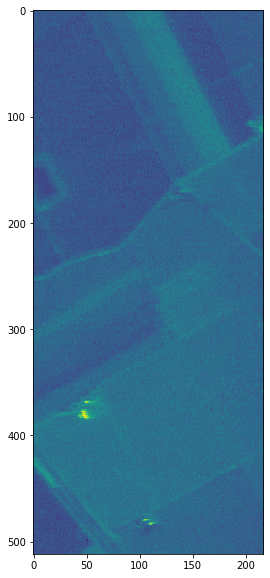

In [ ]:
fig = plt.figure(figsize = (10,10))
plt.imshow(salinas_scene_IN[:,:,2], interpolation='nearest')
plt.show()

In [ ]:
from tqdm import tqdm
import pandas as pd

In [ ]:
def extract_pixels(dataset, ground_truth):
    df = pd.DataFrame()
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']
    return df

In [ ]:
df = extract_pixels(salinas_scene_IN, ground_truth)

100%|██████████| 204/204 [00:04<00:00, 42.69it/s]


In [ ]:
df.head()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,band-11,band-12,band-13,band-14,band-15,band-16,band-17,band-18,band-19,band-20,band-21,band-22,band-23,band-24,band-25,band-26,band-27,band-28,band-29,band-30,band-31,band-32,band-33,band-34,band-35,band-36,band-37,band-38,band-39,band-40,...,band-166,band-167,band-168,band-169,band-170,band-171,band-172,band-173,band-174,band-175,band-176,band-177,band-178,band-179,band-180,band-181,band-182,band-183,band-184,band-185,band-186,band-187,band-188,band-189,band-190,band-191,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,band-201,band-202,band-203,band-204,class
0,290,381,585,1041,1316,1397,1319,1462,1643,1683,1656,1670,1584,1643,1659,1619,1723,1785,1805,1822,1809,1790,1786,1770,1779,1737,1706,1709,1699,1663,1702,1682,1715,1682,1603,1615,1746,1784,1607,1757,...,424,429,437,409,391,378,364,354,329,340,344,337,321,310,291,284,272,254,240,250,216,220,192,162,173,149,134,129,138,104,96,109,93,54,79,54,36,11,17,0
1,290,381,519,1041,1316,1352,1319,1462,1643,1683,1656,1670,1594,1613,1649,1619,1706,1767,1796,1805,1785,1798,1786,1770,1787,1745,1714,1741,1722,1656,1734,1722,1731,1728,1611,1623,1746,1777,1593,1724,...,429,440,439,409,389,382,370,360,331,342,347,340,323,305,298,282,275,254,240,248,211,225,192,162,180,147,136,131,138,111,94,111,96,56,83,56,36,11,15,0
2,290,381,585,1041,1286,1352,1300,1412,1614,1644,1632,1636,1573,1613,1619,1591,1670,1704,1734,1763,1744,1748,1726,1721,1732,1698,1674,1701,1675,1610,1694,1682,1666,1651,1566,1565,1704,1735,1540,1691,...,417,422,420,395,377,368,358,351,324,332,335,325,318,302,283,276,265,251,240,236,223,216,188,162,176,142,125,129,129,106,88,107,89,54,81,54,30,11,11,0
3,290,381,585,999,1316,1374,1280,1380,1584,1631,1596,1603,1531,1562,1580,1526,1617,1668,1707,1704,1703,1698,1675,1680,1677,1651,1609,1620,1605,1571,1615,1609,1601,1604,1513,1499,1647,1660,1486,1620,...,401,408,411,387,365,361,346,339,310,316,325,318,304,285,276,267,260,239,223,234,201,209,176,161,164,136,127,123,131,100,86,105,85,56,75,50,30,11,19,0
4,219,381,585,999,1286,1352,1261,1396,1555,1618,1596,1558,1489,1532,1531,1508,1599,1632,1672,1687,1662,1664,1658,1639,1645,1612,1585,1596,1589,1525,1583,1569,1568,1566,1468,1478,1605,1612,1446,1574,...,394,410,397,376,356,351,340,332,303,318,321,315,297,287,271,265,246,230,216,226,194,202,178,150,167,127,125,120,122,96,83,105,83,48,75,50,24,9,17,0


#### Data Exploration

In [ ]:
df.shape

(111104, 205)

The dataset has 111104 observations and 205 columns 

In [ ]:
print(f"Unique Class Labels: {df.loc[:, 'class'].unique()}")

Unique Class Labels: [ 0  6  7  4  5 15  8  3  2  1 11 12 13 14 10  9 16]


In [ ]:
df.loc[:, 'class'].value_counts()

0     56975
8     11271
15     7268
9      6203
6      3959
2      3726
7      3579
10     3278
5      2678
1      2009
3      1976
12     1927
16     1807
4      1394
14     1070
11     1068
13      916
Name: class, dtype: int64

The above output is the Groundtruth classes for the Salinas scene and their respective samples number

#	Class	Samples
- 1	Brocoli_green_weeds_1	2009 
- 2	Brocoli_green_weeds_2	3726
- 3	Fallow	1976
- 4	Fallow_rough_plow	1394
- 5	Fallow_smooth	2678
- 6	Stubble	3959
- 7	Celery	3579
- 8	Grapes_untrained	11271
- 9	Soil_vinyard_develop	6203
- 10	Corn_senesced_green_weeds	3278
- 11	Lettuce_romaine_4wk	1068
- 12	Lettuce_romaine_5wk	1927
- 13	Lettuce_romaine_6wk	916
- 14	Lettuce_romaine_7wk	1070
- 15	Vinyard_untrained	7268
- 16	Vinyard_vertical_trellis	1807

The pixel of the salinas scene HSI is a one dimensional vector with size (1, 204) ad the HSI has 204 bands.

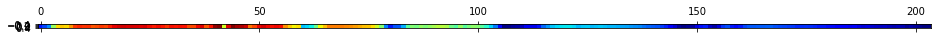

In [ ]:
# Visualizing the pixel
plt.matshow(df.iloc[1, :-1].values.reshape(1,204), cmap='jet');

Interpretting the vector visualisation is difficult, thus to overcome this problem. The pixel vector is reshape into a 2-Dimensional array.

204 => 10 X 24
(1, 204) => (10, 24)


In [ ]:
#from mpl_toolkits.axes_grid1 import make_axes_locatable
#def plot_pixel(pixel, n):
#    ax = plt.gca()
#    im = ax.imshow(pixel.reshape(10, 20.4), cmap = 'jet')
#    plt.title(f'pixel - {n}')
#    plt.axis('off')
#    divider = make_axes_locatable(ax)
#    cax = divider.append_axes("right", size="5%", pad=0.05)
#   plt.colorbar(im, cax=cax)
#   plt.show()

In [ ]:
#plt.figure(figsize=(8, 4))

#rand_n = np.random.randint(df.shape[0])

#plot_pixel(df.iloc[rand_n, :-1].values, rand_n)

In [ ]:
#len(df.iloc[rand_n, :-1].values)

204

#### Boxplot with respect to bands

In [ ]:
import seaborn as sns

Enter the band Number(1-200) :11


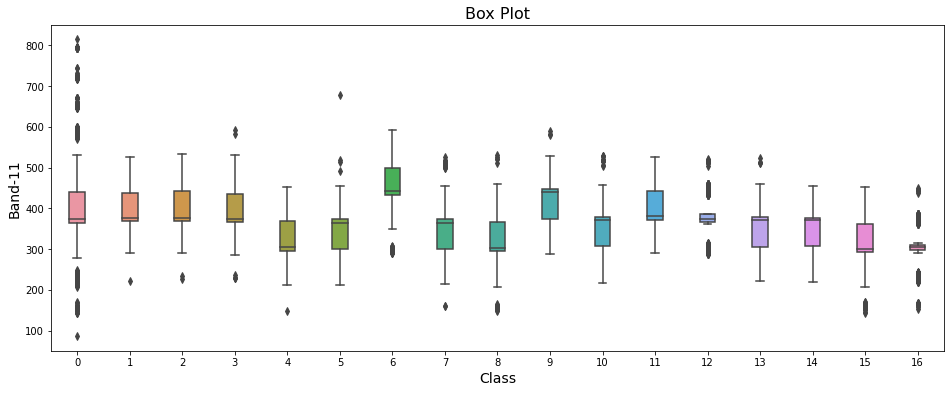

In [ ]:
plt.figure(figsize=(16, 6))
n = int(input('Enter the band Number(1-200) :'))
sns.boxplot( x=df["class"], y=df["band-1"], width=0.3);
plt.title('Box Plot', fontsize= 16)
plt.xlabel('Class', fontsize= 14)
plt.ylabel(f'Band-{n}', fontsize= 14)
plt.show()

In [ ]:
# Distribution plot
print(f"Details of Band - {n}: \n\n{df['band-'+str(n)].describe()}")

Details of Band - 11: 

count    111104.000000
mean       1921.302095
std         468.920942
min          84.000000
25%        1507.000000
50%        2004.000000
75%        2265.000000
max        8387.000000
Name: band-11, dtype: float64


This gives a statistical summary for Band - 11


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


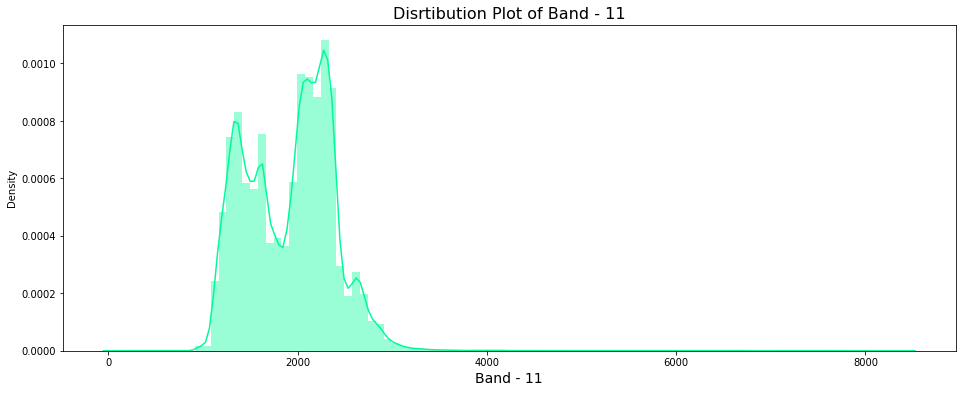

In [ ]:
plt.figure(figsize=(16, 6))
sns.distplot(df['band-'+str(n)], color='mediumSpringGreen', bins=100, hist_kws={'alpha': 0.4});
plt.xlabel('Band - '+str(n), fontsize=14)
plt.title('Disrtibution Plot of Band - '+str(n), fontsize=16)
plt.show()

From the distribution plot above most of the Band-11 pixel values are around 2000

#### Visualizing spectral signatures

The function below plots the spectral signature

In [ ]:
#def plot_signature(df):
#    plt.figure(figsize=(12, 6))
#    pixel_no = np.random.randint(df.shape[0])
#    plt.plot(range(1, 204), df.iloc[pixel_no, :-1].values.tolist(), 'b--', label= f'Class - {df.iloc[pixel_no, -1]}')
#    plt.legend()
#    plt.title(f'Pixel({pixel_no}) signature', fontsize=14)
#    plt.xlabel('Band Number', fontsize=14)
#    plt.ylabel('Pixel Intensity', fontsize=14)
#    plt.show()

In [ ]:
#plot_signature(df)

In [ ]:
df.shape

(111104, 205)

In [ ]:
# Saving the data to a csv file.

df.to_csv('Dataset.csv', index=False)

### d)

In [ ]:
from numpy import array
from sklearn.decomposition import TruncatedSVD

In [ ]:
salinas_scene_data = salinas_scene_IN.reshape(np.prod(salinas_scene_IN.shape[:2]),np.prod(salinas_scene_IN.shape[2:]))

# New shape of the data is
print(salinas_scene_IN.shape)

(512, 217, 204)


In [ ]:
#standardize data
from sklearn.preprocessing import StandardScaler
salinas_scene_data = StandardScaler().fit_transform(salinas_scene_data)

In [ ]:
# check shape of the data-

print(salinas_scene_data.shape)

(111104, 204)


In [ ]:
#Here we are going to reduce the dimensions from 204 to 20.
svd = TruncatedSVD(n_components=20)
svd.fit(salinas_scene_data)

TruncatedSVD(algorithm='randomized', n_components=20, n_iter=5,
             random_state=None, tol=0.0)

In [ ]:
salinas_scene_data_svd = svd.fit_transform(salinas_scene_data)

In [ ]:
# You can find the amount of information provided by each band using explained_variance_ratio_.

print(svd.explained_variance_ratio_)

[6.62990560e-01 2.75551005e-01 2.24743773e-02 1.53391013e-02
 8.39932529e-03 4.60708176e-03 2.35802633e-03 1.96938441e-03
 1.59594278e-03 9.66829572e-04 6.11666120e-04 4.66948613e-04
 4.33978742e-04 3.34102741e-04 2.85312658e-04 2.40981758e-04
 1.75830336e-04 1.25660377e-04 1.15526439e-04 9.86711392e-05]


In [ ]:
print(salinas_scene_data_svd.shape)

(111104, 20)


In [ ]:
ev=svd.explained_variance_ratio_

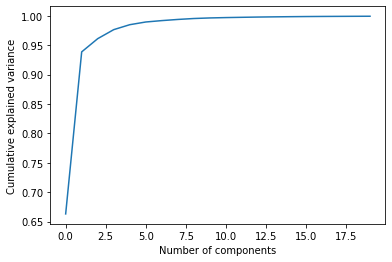

In [ ]:
#Visualization of explained variance ratio

plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

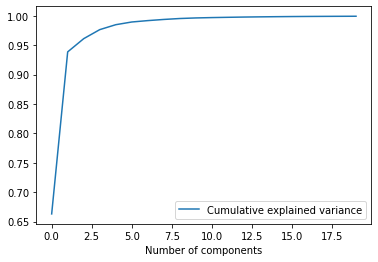

In [ ]:
# Inetactive plot
df3 = pd.DataFrame(ev, columns=['Cumulative explained variance']).cumsum()
df3['Number of components'] = pd.Series(list(range(20)))
df3.plot(x='Number of components', y='Cumulative explained variance')

In [ ]:
#To reshape the array-

salinas_scene_data_sv_new = salinas_scene_data_svd.reshape(512,217,20)
print(salinas_scene_data_sv_new.shape)

(512, 217, 20)


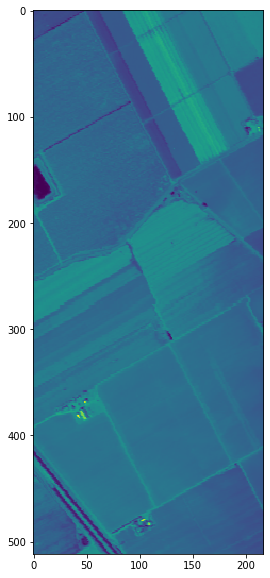

In [ ]:
#To display one band data-

fig = plt.figure(figsize = (10,10))
plt.imshow(salinas_scene_data_sv_new[:,:,1], interpolation='nearest')
plt.show()

### e)

#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:, :-1].values

y = df.iloc[:, -1].values

In [ ]:
X.shape, y.shape

((111104, 204), (111104,))

In [ ]:
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(salinas_scene_data_svd, y,  range(X.shape[0]), 
                                                                                  test_size = 0.15, random_state = 11)

X_train.shape, X_test.shape

((94438, 20), (16666, 20))

In [ ]:
svm = SVC(kernel='rbf', degree = 10, gamma='scale', cache_size=1024*7)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=7168, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}%')

Accuracy: 0.8766950678027121%


### f)

#### Confusion Matrix

In [ ]:
! pip install -q scikit-plot

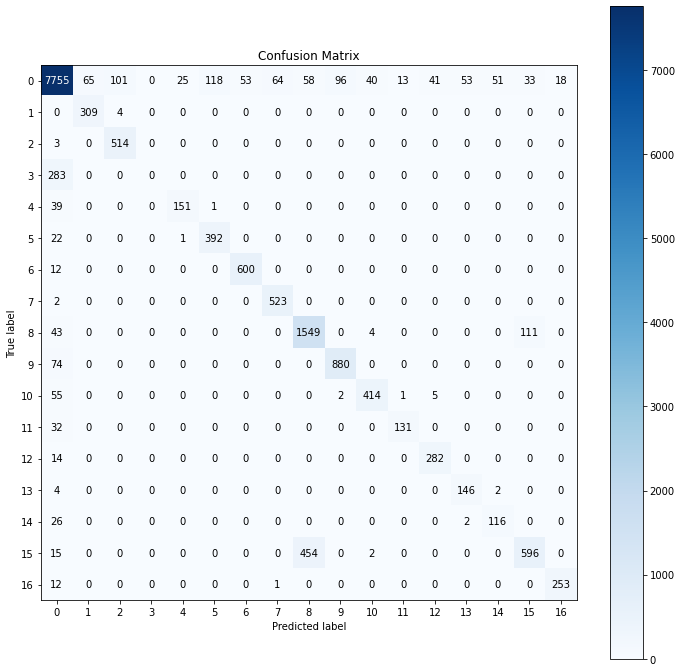

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12));

BAsed on the confusion we can conclude that Predicted labels are in coherence with True labels in terms of classes
class -0  has 7755 aligned with predicted label


